# Data description & Problem statement: 
This dataset is originally from the National Institute of Diabetes and Digestive and Kidney Diseases. The objective of the dataset is to diagnostically predict whether or not a patient has diabetes, based on certain diagnostic measurements included in the dataset. Several constraints were placed on the selection of these instances from a larger database. In particular, all patients here are females at least 21 years old of Pima Indian heritage.

The type of dataset and problem is a classic supervised binary classification. Given a number of elements all with certain characteristics (features), we want to build a machine learning model to identify people affected by type 2 diabetes.

# Workflow:
- Load the dataset, and define the required functions (e.g. for detecting the outliers)
- Data Cleaning/Wrangling: Manipulate outliers, missing data or duplicate values, Encode categorical variables, etc. 
- Split data into training & test parts (utilize the training part for training & hyperparameter tuning of model, and test part for the final evaluation of model)
   #  Model Training:
- Cross-validation of Logistic Regression model with L1 regularization
- Cross-validation of Logistic Regression model with L2 regularization
- Use grid-search along with C-V approach to find the best hyperparameters of Logistic Regression model with both L1 & L2 regularizations: Find the best LR model (Note: I've utilized SMOTE technique via imblearn toolbox to synthetically over-sample the minority category and even the dataset imbalances.)
   # Model Evaluation: 
- Evaluate the best LR model with optimized hyperparameters on Test Dataset, by calculating:
     - AUC score
     - Confusion matrix
     - ROC curve  
     - Precision-Recall curve 
     - Average precision

In [1]:
import sklearn
import tensorflow as tf
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn import preprocessing
%matplotlib inline

from scipy import stats

import warnings
warnings.filterwarnings("ignore")

In [2]:
df=pd.read_csv('C:/Users/rhash/Documents/Datasets/pima-indian-diabetes/indians-diabetes.csv') 

# To Shuffle the data:
np.random.seed(42)
df=df.reindex(np.random.permutation(df.index))
df.reset_index(inplace=True, drop=True)

df.columns=['NP', 'GC', 'BP', 'ST', 'I',  'BMI', 'PF', 'Age', 'Class']
df.head()

,NP,GC,BP,ST,I,BMI,PF,Age,Class
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
NP       768 non-null int64
GC       768 non-null int64
BP       768 non-null int64
ST       768 non-null int64
I        768 non-null int64
BMI      768 non-null float64
PF       768 non-null float64
Age      768 non-null int64
Class    768 non-null int64
dtypes: float64(2), int64(7)
memory usage: 54.1 KB


In [4]:
df['ST'].replace(0, df[df['ST']!=0]['ST'].mean(), inplace=True)
df['GC'].replace(0, df[df['GC']!=0]['GC'].mean(), inplace=True)
df['BP'].replace(0, df[df['BP']!=0]['BP'].mean(), inplace=True)
df['BMI'].replace(0, df[df['BMI']!=0]['BMI'].mean(), inplace=True)
df['I'].replace(0, df[df['I']!=0]['I'].mean(), inplace=True)

In [5]:
X=df.drop('Class', axis=1)
y=df['Class']

# We initially devide data into training & test folds: We do the Grid-Search only on training part  
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=42)

In [6]:
from sklearn.preprocessing import StandardScaler, MinMaxScaler

scalor_X=MinMaxScaler().fit(X_train)
X_train=scalor_X.transform(X_train)
X_test=scalor_X.transform(X_test)

Max. Lasso score =  0.8454424651372021


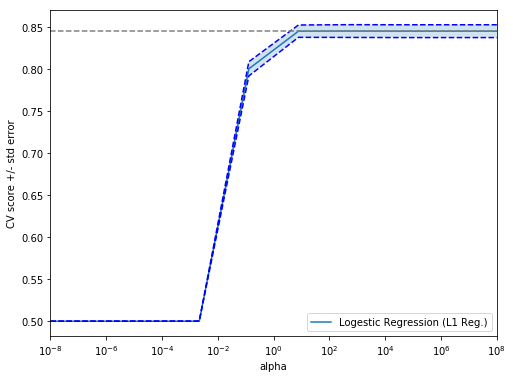

In [7]:
from sklearn.linear_model import LogisticRegression

# Cross-Validation for Logestic Regression algorithm: L1 Regularization
from sklearn.model_selection import StratifiedKFold
from sklearn.model_selection import cross_val_score

model = LogisticRegression(penalty='l1', random_state=42)
C = np.logspace(-8, 8, 10)

scores = list()
scores_std = list()

n_folds=5
kfold= StratifiedKFold(n_splits=n_folds, shuffle=True, random_state=42)

for c in C:
    model.C = c
    this_scores = cross_val_score(model, X_train, y_train, cv=kfold, scoring="roc_auc")
    scores.append(np.mean(this_scores))
    scores_std.append(np.std(this_scores))

scores, scores_std = np.array(scores), np.array(scores_std)

print("Max. Lasso score = ", np.max(scores))


plt.figure().set_size_inches(8, 6)
plt.semilogx(C, scores)

# plot error lines showing +/- std. errors of the scores
std_error = scores_std / np.sqrt(n_folds)

plt.semilogx(C, scores + std_error, 'b--')
plt.semilogx(C, scores - std_error, 'b--')

# alpha=0.2 controls the translucency of the fill color
plt.fill_between(C, scores + std_error, scores - std_error, alpha=0.2)

plt.ylabel('CV score +/- std error')
plt.xlabel('alpha')
plt.axhline(np.max(scores), linestyle='--', color='.5')
plt.xlim([C[0], C[-1]])
plt.legend(['Logestic Regression (L1 Reg.)'])

Max. Lasso score =  0.8463107512370671


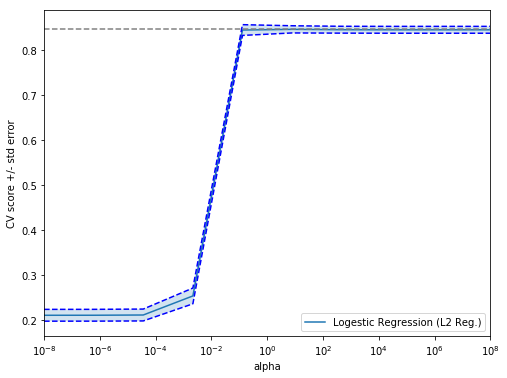

In [8]:
# Cross-Validation for Logestic Regression algorithm: L2 Regularization
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score

model = LogisticRegression(penalty='l2', random_state=42)
C = np.logspace(-8, 8, 10)

scores = list()
scores_std = list()

n_folds=5
kfold= StratifiedKFold(n_splits=n_folds, shuffle=True, random_state=42)

for c in C:
    model.C = c
    this_scores = cross_val_score(model, X_train, y_train, cv=kfold, scoring="roc_auc")
    scores.append(np.mean(this_scores))
    scores_std.append(np.std(this_scores))

scores, scores_std = np.array(scores), np.array(scores_std)

print("Max. Lasso score = ", np.max(scores))

plt.figure().set_size_inches(8, 6)
plt.semilogx(C, scores)

# plot error lines showing +/- std. errors of the scores
std_error = scores_std / np.sqrt(n_folds)

plt.semilogx(C, scores + std_error, 'b--')
plt.semilogx(C, scores - std_error, 'b--')

# alpha=0.2 controls the translucency of the fill color
plt.fill_between(C, scores + std_error, scores - std_error, alpha=0.2)

plt.ylabel('CV score +/- std error')
plt.xlabel('alpha')
plt.axhline(np.max(scores), linestyle='--', color='.5')
plt.xlim([C[0], C[-1]])
plt.legend(['Logestic Regression (L2 Reg.)'])

In [9]:
# Grid-Search for the best model parameters: 
from sklearn.model_selection import GridSearchCV

param=[{'penalty':['l2'], 'C': [0.01, 0.1, 0.5, 1, 5, 10, 20, 50, 100]} ,
       {'penalty':['l1'], 'C': [0.01, 0.1, 0.5, 1, 5, 10, 20, 50, 100]}]

kfold=StratifiedKFold(n_splits=5, shuffle=True, random_state=42)
grid_search=GridSearchCV(LogisticRegression(random_state=42, class_weight='balanced'), param, cv=kfold, scoring="roc_auc")
grid_search.fit(X_train, y_train)

# Grid-Search report: 
G=pd.DataFrame(grid_search.cv_results_).sort_values("rank_test_score")
G.head(3)

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_C,param_penalty,params,split0_test_score,split1_test_score,split2_test_score,...,mean_test_score,std_test_score,rank_test_score,split0_train_score,split1_train_score,split2_train_score,split3_train_score,split4_train_score,mean_train_score,std_train_score
2,0.001285,0.000394,0.000500,0.000009,0.5,l2,"{'C': 0.5, 'penalty': 'l2'}",0.803618,0.849671,0.861333,...,0.846379,0.022052,1,0.862513,0.855032,0.852597,0.852680,0.852111,0.854987,0.003897
3,0.001290,0.000397,0.000595,0.000198,1,l2,"{'C': 1, 'penalty': 'l2'}",0.805921,0.848355,0.858667,...,0.846041,0.020916,2,0.863662,0.855638,0.853867,0.852930,0.853684,0.855956,0.003954
4,0.001191,0.000243,0.000595,0.000199,5,l2,"{'C': 5, 'penalty': 'l2'}",0.812500,0.840461,0.856000,...,0.845643,0.018677,3,0.864895,0.856746,0.855221,0.853742,0.853642,0.856849,0.004179


In [10]:
print("Best parameters: ", grid_search.best_params_)
print("Best validation accuracy:  %0.2f (+/- %0.2f)" % (np.round(grid_search.best_score_, decimals=2), np.round(G.loc[grid_search.best_index_,"std_test_score" ], decimals=2)))
print("Test score: ", np.round(grid_search.score(X_test, y_test),2))

Best parameters:  {'C': 0.5, 'penalty': 'l2'}
Best validation accuracy:  0.85 (+/- 0.02)
Test score:  0.79


Confusion matrix, without normalization
[[83 40]
 [19 50]]
Normalized confusion matrix
[[0.67 0.33]
 [0.28 0.72]]


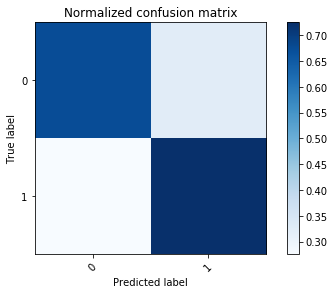

In [11]:
from sklearn.metrics import roc_curve, auc, confusion_matrix, classification_report

# Plot a confusion matrix.
# cm is the confusion matrix, names are the names of the classes.
def plot_confusion_matrix(cm, names, title='Confusion matrix', cmap=plt.cm.Blues):
    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(names))
    plt.xticks(tick_marks, names, rotation=45)
    plt.yticks(tick_marks, names)
    plt.tight_layout()
    plt.ylabel('True label')
    plt.xlabel('Predicted label')

class_names=["0", "1"]
    
# Compute confusion matrix
cm = confusion_matrix(y_test, grid_search.predict(X_test))
np.set_printoptions(precision=2)
print('Confusion matrix, without normalization')
print(cm)


# Normalize the confusion matrix by row (i.e by the number of samples in each class)
cm_normalized = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
print('Normalized confusion matrix')
print(cm_normalized)
plt.figure()
plot_confusion_matrix(cm_normalized, class_names, title='Normalized confusion matrix')

plt.show()

In [12]:
# Classification report:
report=classification_report(y_test, grid_search.predict(X_test))
print(report)

             precision    recall  f1-score   support

          0       0.81      0.67      0.74       123
          1       0.56      0.72      0.63        69

avg / total       0.72      0.69      0.70       192



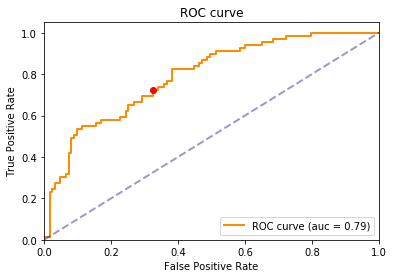

In [13]:
# ROC curve & auc:
from  sklearn.metrics import precision_recall_curve, roc_curve, roc_auc_score, average_precision_score

fpr, tpr, thresholds=roc_curve(np.array(y_test),grid_search.predict_proba(X_test)[:, 1] , pos_label=1)
roc_auc=roc_auc_score(np.array(y_test), grid_search.predict_proba(X_test)[:, 1])

plt.figure()

plt.step(fpr, tpr, color='darkorange', lw=2, label='ROC curve (auc = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], color='navy', alpha=0.4, lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC curve')
plt.legend(loc="lower right")

plt.plot([cm_normalized[0,1]], [cm_normalized[1,1]], 'or')
plt.show()

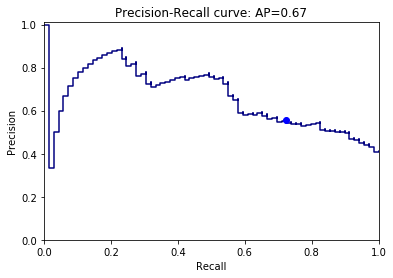

In [21]:
# Precision-Recall trade-off:
precision, recall, thresholds=precision_recall_curve(y_test,grid_search.predict_proba(X_test)[:, 1],  pos_label=1)
ave_precision=average_precision_score(y_test,grid_search.predict_proba(X_test)[:, 1])

plt.step(recall, precision, color='navy')

plt.xlabel('Recall')
plt.ylabel('Precision')
plt.xlim([0, 1.001])
plt.ylim([0, 1.01])
plt.title('Precision-Recall curve: AP={0:0.2f}'.format(ave_precision))

plt.plot([cm_normalized[1,1]], [cm[1,1]/(cm[1,1]+cm[0,1])], 'ob')
plt.show()

In [15]:
ind=y_test.index
df_X=pd.DataFrame(X_test)
pred=pd.DataFrame(grid_search.predict(X_test))

In [16]:
c=0
L=[]
for i in list(ind):
    if y_test.loc[i]==pred.iloc[c][0] and y_test.loc[i]==1:
        L.append(1)
    elif  y_test.loc[i]!=pred.iloc[c][0] and y_test.loc[i]==1:
        L.append(0)
    c+=1

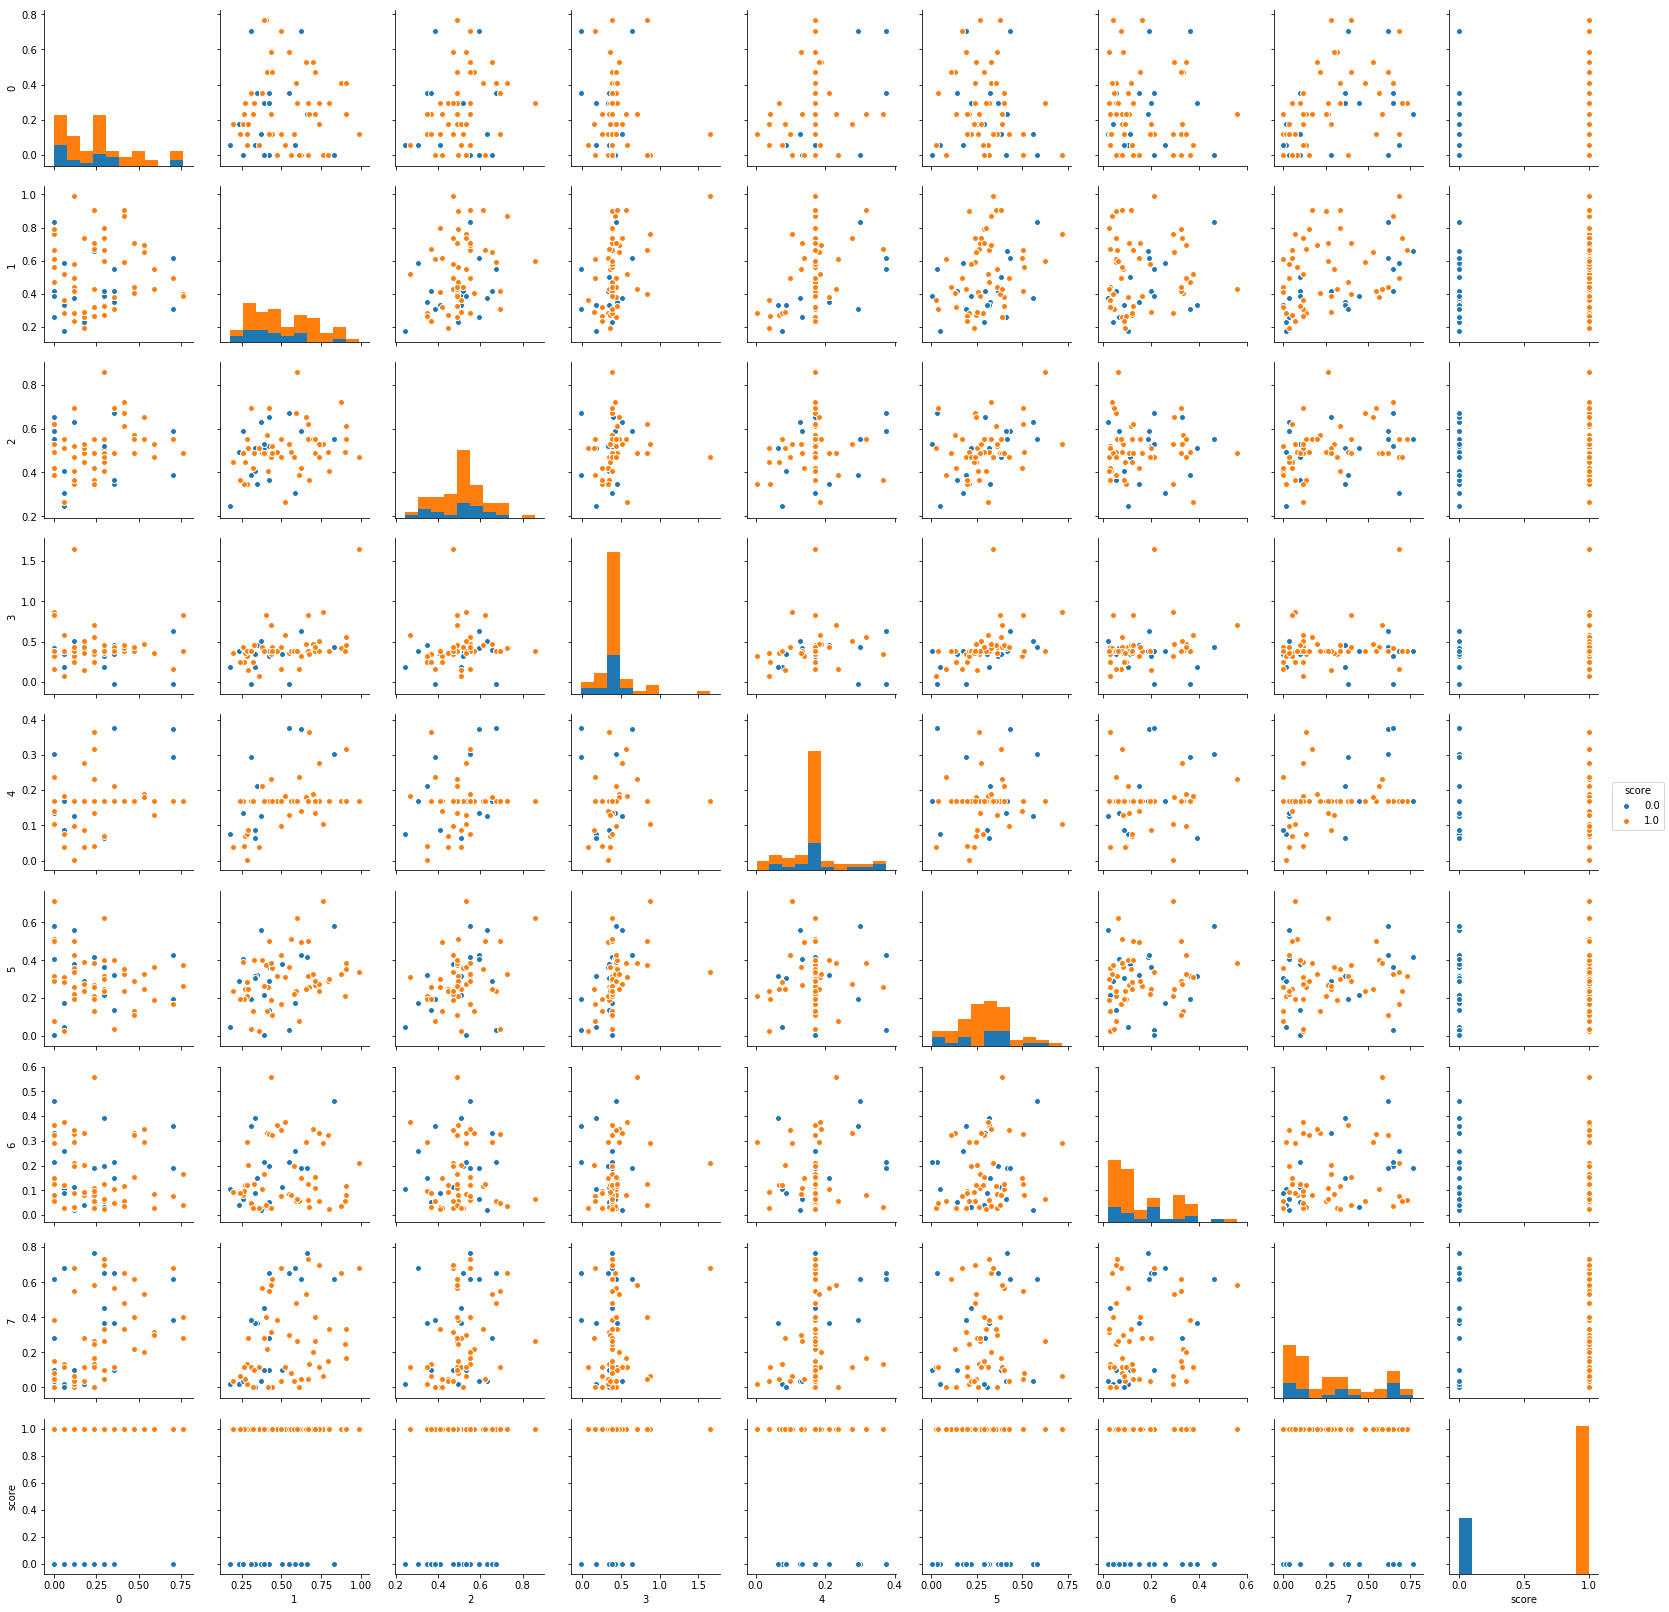

In [17]:
pd.concat([df_X,pd.DataFrame(L, columns=['score'])], axis=1)

sns.pairplot(pd.concat([df_X, pd.DataFrame(L, columns=['score'])], axis=1), hue='score')

In [18]:
c=0
H=[]
for i in list(ind):
    if y_test.loc[i]==pred.iloc[c][0]:
        H.append(1)
    elif  y_test.loc[i]!=pred.iloc[c][0]:
        H.append(0)
    c+=1

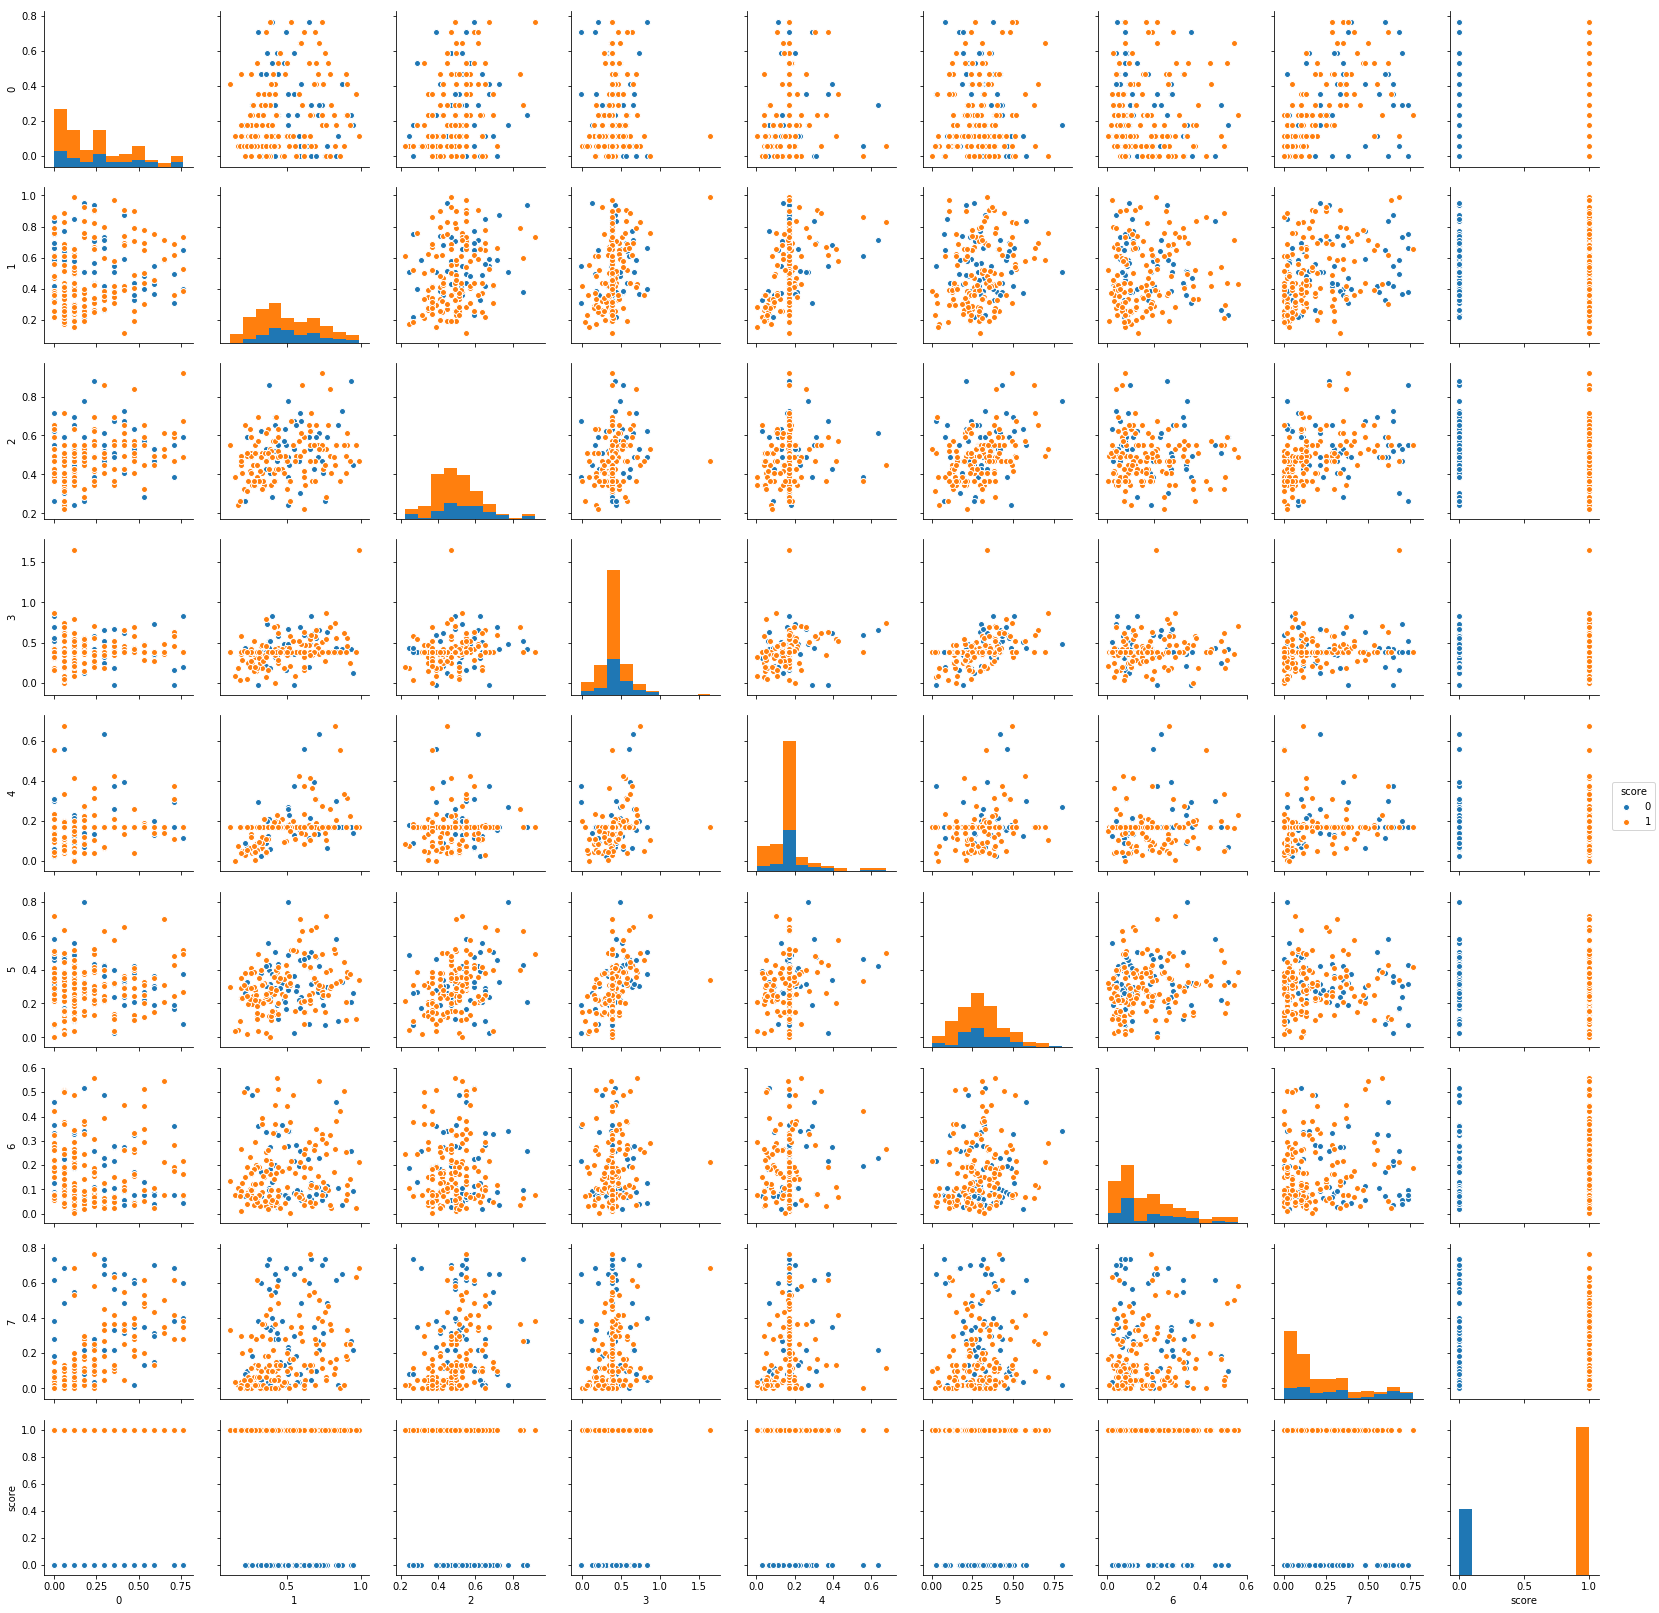

In [19]:
pd.concat([df_X,pd.DataFrame(H, columns=['score'])], axis=1)

sns.pairplot(pd.concat([df_X, pd.DataFrame(H, columns=['score'])], axis=1), hue='score')